# Homework 5: Bayesian Classifiers

Follow the instructions in the template, score will be given uppon it.

### Import libraries
You are allowed to use these libraries only.

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Part 1 - Bernoulli Naive Bayes

In [73]:
data = pd.read_csv("train_NB.csv")

The data, the X and the y. 

In [74]:
X = data.drop(columns='Label').values
y = data['Label'].values

Here you should write down your code. It's ok if the code is suitable for just 2 classes.

In [75]:
class BernoulliNaiveBayes:
    
    def __init__(self):  
        self.priors=np.array([])
        self.p_X_1_y_0=np.array([])
        self.p_X_1_y_1=np.array([])
    
    def fit(self, X, y):
        # X and y are numpy arrays.
        # Use numpy (or pandas) the find the priors, P(y=0) and P(y=1)
        # find P(X=1|y=0) and P(X=1|y=1) for each feature.
        # The .fit method can be written in 3 lines of code. 
        
        #TODO: your solution
       self.priors=np.array([np.sum(y==0), np.sum(y==1)])/len(y)
       self.p_X_1_y_0=X[y==0].mean(axis=0)
       self.p_X_1_y_1=X[y==1].mean(axis=0)
     
    def predict_proba(self, X) -> np.array:      
        # Given a new sample X, you should return a probability vector with 2 elements.
        # The probability of class 0, and the probability of class 1.
        # Given an n by p matrix, you should return an n by 2 matrix.
        # The .predict_proba method can be written in 3 lines of code. (you may also use more)
        
        #TODO: your solution
        proba_0=self.priors[0]*np.prod(np.power(self.p_X_1_y_0,X)*np.power(1-self.p_X_1_y_0,1-X), axis=1)
        proba_1=self.priors[1]*np.prod(np.power(self.p_X_1_y_1,X)*np.power(1-self.p_X_1_y_1,1-X), axis=1)
        return (np.array([proba_0, proba_1])/(proba_0+proba_1)).T

    def predict(self, X) -> np.array:
        # Given a new sample X, you should return the predicted label, which is the one with the highest probability.
        # You may use previous methods
        #TODO: your solution
        return np.argmax(self.predict_proba(X), axis=1)

    def get_likelihood(self) -> np.array:
        # Returns the likelihood for each x value, given the y value p(x|y).
        # Should return a matrix with shape: (#classes, #features)
        # for that matrix X[i,j] = p(X_j=1|y=i)
        #TODO: your solution
        return np.array([self.p_X_1_y_0, self.p_X_1_y_1])

### Equations
$$p(y=1)=\frac{\sum_{i=1}^{n}{{y_{i}=1}}}{n}$$
$$p(X|y_k)=\prod_{i=1}^{n}{p_{k_i}^{x_i}(1-p_{k_i})^{(1-x_i)}}$$
$$p(X=1|y=0)=\frac{p(X=1)p(y=0|X=1)}{p(X=1)p(y=0|X=1)+p(X=0)p(y=0|X=0)}$$
$$\argmax_{y=0,1} p(y)\cdot p(x|y)$$  
[based on equations from wikipedia and from the lecture notes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Bernoulli_naive_Bayes)

In order to make sure you have done it right, check the probabilities for the samples [[1,0,1], [1,1,1], [0,1,1]]. <br>


In [76]:
clf = BernoulliNaiveBayes() #It is the class you just wrote down.

test = np.array([[1,0,1], [1,1,1], [0,1,1]]) #The test sample.

clf.fit(X,y)

print (clf.predict_proba(test))

#expected answer:
#[[ 0.55555556  0.44444444]
# [ 0.45454545  0.54545455]
# [ 0.          1.        ]]

print(clf.predict(test))

# expected answer:
# [0,1,1]

[[0.55555556 0.44444444]
 [0.45454545 0.54545455]
 [0.         1.        ]]
[0 1 1]


# Part 2 - Predicting  gender from name

### read data

In [77]:
df = pd.read_csv("names.csv", index_col=0)
y = df.is_female

### generate features

In this part, you shall perform a task from the domain of Natural Language Processing (NLP).
You shall predict whether a name belongs to a male or a female. For simplicity, we shall do this only based on the last letter of the name.
In NLP many times we need to make up features using expert knowledge to be able to classify words. <br>
In the following cell you are asked to:
1. Extract the last letter of every name
2. Make a **Numpy array** `X` of dummy varialbes (one hot encoding) from the last letter feature.<br>
   (use pd.get_dummies)

In [78]:
#TODO: Extract the last letter of every name
last_letter = df.name[:].str.slice(start=-1)
#TODO: Make binary data 
X = pd.get_dummies(last_letter).values

### train and predict

Now that we have a binary data we can use the `BernoulliNaiveBayes` class you wrote to classify the names. <br>
Run the cell below to see the results, and answer the question below.
1. we plot 2 plots of the most common male/female letters ($P(X|y)$)
2. we plot the predictions ($P(y|X)$) for every letter

accuracy: 75%


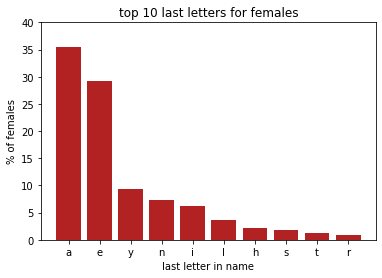

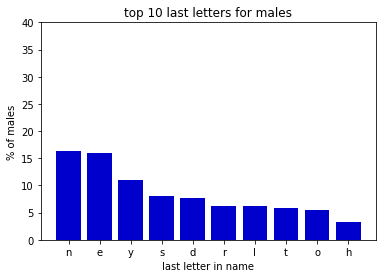

,female_proba
a,0.988287
i,0.845649
e,0.770754
y,0.563696
h,0.506333
l,0.476937
x,0.437547
n,0.383315
u,0.334937
w,0.287133


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
clf = BernoulliNaiveBayes() #It is the class you just wrote.
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = (preds == y_test).mean()
print(f"accuracy: {(acc*100):.0f}%")


letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
           'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] # no name ending in `q`


#using likelihood method
likelihood_matrix = clf.get_likelihood()
p1 = likelihood_matrix[1]
p0 = likelihood_matrix[0]
# most indicating letter for each gender
female = pd.Series(p1, index=letters).sort_values(ascending=False).head(10)
male = pd.Series(p0, index=letters).sort_values(ascending=False).head(10)

# plot results
plt.bar(female.index, female*100, color='firebrick')
plt.ylabel("% of females")
plt.xlabel("last letter in name")
plt.title("top 10 last letters for females")
plt.ylim(0,40)
plt.show()

plt.bar(male.index, male*100, color='mediumblue')
plt.ylabel("% of males")
plt.ylim(0,40)
plt.xlabel("last letter in name")
plt.title("top 10 last letters for males")
plt.show()

is_letter_female = clf.predict_proba(np.eye(25))[:, 1]
is_letter_female = pd.DataFrame(is_letter_female, index = letters, columns=['female_proba'])
is_letter_female = is_letter_female.sort_values('female_proba', ascending=False)
is_letter_female.style.background_gradient(cmap='coolwarm')

### question
explain how come the letter *i* has higher probability to be feminine than *y* even though it is less popular for women?

**Answer:** <br>
the prediction of a class label is based on $${posterior}=\frac{prior\cdot likelihood}{evidence}\rightarrow\argmax_{y=0,1} p(y)\cdot p(x|y)$$   
The above plots are based on the likelihood of female and men last letters ->  
the likelihood of *i* to be the last letter of a female is smaller than the likelihood of *y* to be the last letter of a female $p(i|female)<p(y|female)$  
but in this case the prior of *i* cause the posterior of *i* to be greater than the posterior of *y*.  
$p(female|i)>p(female|y)$ and this conclude that the letter *i* has higher probability to be feminine than *y* even though it is less popular for women.